In [16]:
from math import pi, sin, cos
from typing import Sequence
import plotly.express as pe
import numpy as np
import random
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [17]:
class Object:
            """
            the class to create and handle fractal Objects

            methods:

            shift:
                the function to apply the shift on the object
            scale:
                the function to apply the scaling on the object
            rotate:
                the function to apply the rotation on the object
            copy:
                creates a new object with the same values for attributes

            getPlot:
            """

            def __init__(self, startingPoint: Sequence[float],length:float,theta:float,changing:bool) -> None:
                """
                the function to create the fractal objects
                the init color is blue

                :param startingPoint:the starting point of the object stored as np.array
                :type startingPoint:Sequence[float]
                :param endPoint:the endPoint of the object stored as np.array
                :type endPoint:Sequence[float]
                """
                self.startingPoint = np.array(startingPoint)
                self.changing = changing
                self.theta = np.array(theta)
                self.length = np.array(length)

            def copy(self) -> object:
                """
                the function to create a new object with the same properties as the input object

                :return:the new object
                :rtype:object
                """
                return Object(self.startingPoint.copy(),self.length.copy(),self.theta.copy(),self.changing)


            def scale(self, scaleParam: float) -> object:
                """
                the function to apply the scaling on the object

                :param r:the scaling coefficient
                :type r: float
                :return:the exact object
                :rtype:object
                """
                self.length *= scaleParam
                return self

            def shift(self,shiftParams:np.array) -> object:
                """
                the function to apply the shift on the object
                R is the rotating matrix witch should be applied on the shift vector

                :param shiftParams:(the shift vector /length of object)
                :type shiftParams:np.array
                :return:the exact object
                :rtype:object
                """
                R = np.array([[cos(self.theta),sin(self.theta)],[-sin(self.theta),cos(self.theta)]])
                self.startingPoint += self.length*R.dot(shiftParams)
                return self

            def rotate(self, rotatingParam: float) -> object:
                """
                the function to apply the rotation on the object
                R is the rotating matrix

                :param rotatingParam: the change of theta
                :type rotatingParam: float
                :return:the exact object
                :rtype:object
                """
                self.theta += rotatingParam
                return self

            def mirror(self, mirrorParam: bool):
                # if mirrorParam:
                #     self.theta *= -1
                return self
            def getPoints(self) -> Sequence[Sequence[float]]:
                """
                the function to get the plot of the object

                :return:the plot of the object
                :rtype:plt.plot
                """
                return [self.startingPoint[0],self.startingPoint[0]+self.length*sin(self.theta)],[self.startingPoint[1],self.startingPoint[1]+self.length*cos(self.theta)]


In [18]:
class Transformer:
    """
    the class to create and perform transformers

    methods:
    subTransform:
        to apply all changes of a transformer on an object and return aa new object
    """
    def __init__(self, scaleParam: float, rotateParam: float,shiftParams:Sequence[float],mirrorParam : bool,changingParam:bool) -> None:
        """
        creates transformers based on the params

        :param scaleParam:the scale coefficient of transformer
        :type scaleParam: float
        :param shiftParams:the shift vector of the transformer
        :type shiftParams: np.array
        :param rotateParam:the change of theta witch the transformer applies
        :type rotateParam: float
        """
        self.scaleParams =scaleParam
        self.rotateParam = rotateParam
        self.shiftParams = np.array(shiftParams)
        self.mirrorParam = mirrorParam
        self.changingParam = changingParam

    def subTransform(self, obj: object) -> object:
        """
        to apply all changes of a transformer on an object and return aa new object
        the sort of the changes is important.

        :param obj:the first object
        :type obj: object
        :return: new object
        :rtype: object
        """
        newObj = obj.copy()
        if obj.changing:

            newObj.changing = self.changingParam
            return newObj.shift(self.shiftParams).mirror(self.mirrorParam).scale(self.scaleParams).rotate(self.rotateParam)
        else:
            return newObj


In [19]:
class BarnsleyFern:
    """
    the class to create Dragon highway object and simulate the fractal growth

    methods:
        visualize:
            the function to create a plotly plot of the objects at the step
        transform:
            the function to apply all the transformers on the input object
        step:
            the function to go one step forward
    """

    def getSequence(self, depth: int) -> Sequence[Transformer]:
        """
        returns a random sequence of transformers with the input size

        :param depth:the depth of fractal growth
        :type depth:int
        :return:the random list of transformers with the size of depth
        :rtype:Sequence[Transformer]
        """
        return random.choices(self.transformers,k = depth)

    def __init__(self, firstObject: object, transformers: Sequence[Transformer]) -> None:
        """
        the function to create the Dragon object with the first object and the transformers

        :param firstObject:the first input
        :type firstObject:object
        :param transformers:the transformers to apply on the objects
        :type transformers:Transformer
        """
        self.objects:np.array = [firstObject]
        self.transformers = transformers

    def visualize(self) -> None:
        """
        the function to create a plotly plot of the objects at the step
        """
        x = []
        y = []
        lines = []
        for obj in self.objects:
            plt.plot(obj.getPoints()[0],obj.getPoints()[1],color = "blue")

            lines.append(pe.line(x = obj.getPoints()[0],y = obj.getPoints()[1]))

        # fig  = lines[0]
        # for line in lines:
        #     fig.add_trace(line.data[0])
        #
        # fig.show()

    def transform(self, obj: object) -> Sequence[object]:
        """
        the function to apply all the transformers on the input object

        :param obj:the input object
        :type obj:object
        :return:the new output objects
        :rtype:Sequence[object]
        """
        outputs = []
        for transformer in self.transformers:
            outputs.append(transformer.subTransform(obj))

        return outputs

    def step(self) -> None:
        """
        the function to go one step forward
        """
        new_objects = []
        for obj in self.objects:
            new_objects += self.transform(obj)

        self.objects = new_objects

    def drawRandomFractal(self, depth: int, iterations: int) -> None:
        """
        draws a random Sierpinski triangle fractal plot

        :param depth:the depth of fractal growth
        :type depth:int
        :param iterations:the number of redrawing iterations
        :type iterations:int

        """
        x = []
        y = []
        lines = []

        for _ in range(iterations):
            sequence = self.getSequence(depth)
            newObj = firstObject
            for i in range(depth):
                newObj = sequence[i].subTransform(newObj)

            plt.plot(newObj.getPoints()[0],newObj.getPoints()[1],color = "blue")
            lines.append(pe.line(x = newObj.getPoints()[0],y = newObj.getPoints()[1]))


        # fig  = lines[0]
        # for line in lines:
        #     fig.add_trace(line.data[0])

        #fig.show()





In [31]:
firstObject = Object([0.,0.],1.,0.,True)
transformer1 = Transformer(0.8,pi/18,[0.,0.2],False,True)
transformer2 = Transformer(0.3,pi/4,[0.,0.1],True,True)
transformer3= Transformer(0.3,-pi/4,[0.,0.2],False,True)
transformer4 = Transformer(0.2,0,[0,0],False,False)
fractal = BarnsleyFern(firstObject,[transformer1,transformer2,transformer3,transformer4])

In [32]:
for _ in range(5):
    fractal.step()

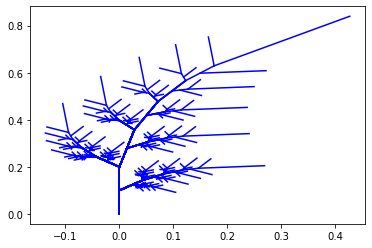

In [33]:
fractal.visualize()

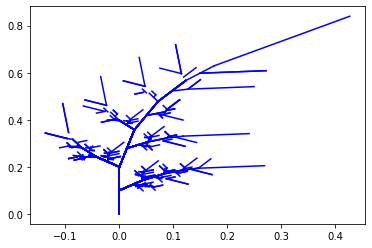

In [42]:
fractal.drawRandomFractal(5,1000)

In [41]:
4**5

1024